In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('Customer-Churn-Records[1].csv')
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [4]:
df.shape

(10000, 18)

In [5]:
df.isnull().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

In [6]:
df.isnull().sum()/len(df)*100

RowNumber             0.0
CustomerId            0.0
Surname               0.0
CreditScore           0.0
Geography             0.0
Gender                0.0
Age                   0.0
Tenure                0.0
Balance               0.0
NumOfProducts         0.0
HasCrCard             0.0
IsActiveMember        0.0
EstimatedSalary       0.0
Exited                0.0
Complain              0.0
Satisfaction Score    0.0
Card Type             0.0
Point Earned          0.0
dtype: float64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [9]:
df.corr()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016140,-0.016957,0.009289,0.002360
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006203,-0.007293,-0.000865,-0.013076
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.026771,-0.027048,-0.012599,0.000077
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285296,0.283530,-0.000876,0.002222
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.013656,-0.013047,0.008663,-0.010196
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118577,0.119124,-0.002588,0.014608
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047611,-0.046357,-0.011394,-0.015330
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.006976,-0.007095,-0.000212,-0.011041
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156356,-0.154741,0.010236,-0.004983
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012490,0.012494,-0.013747,-0.001515


<AxesSubplot:>

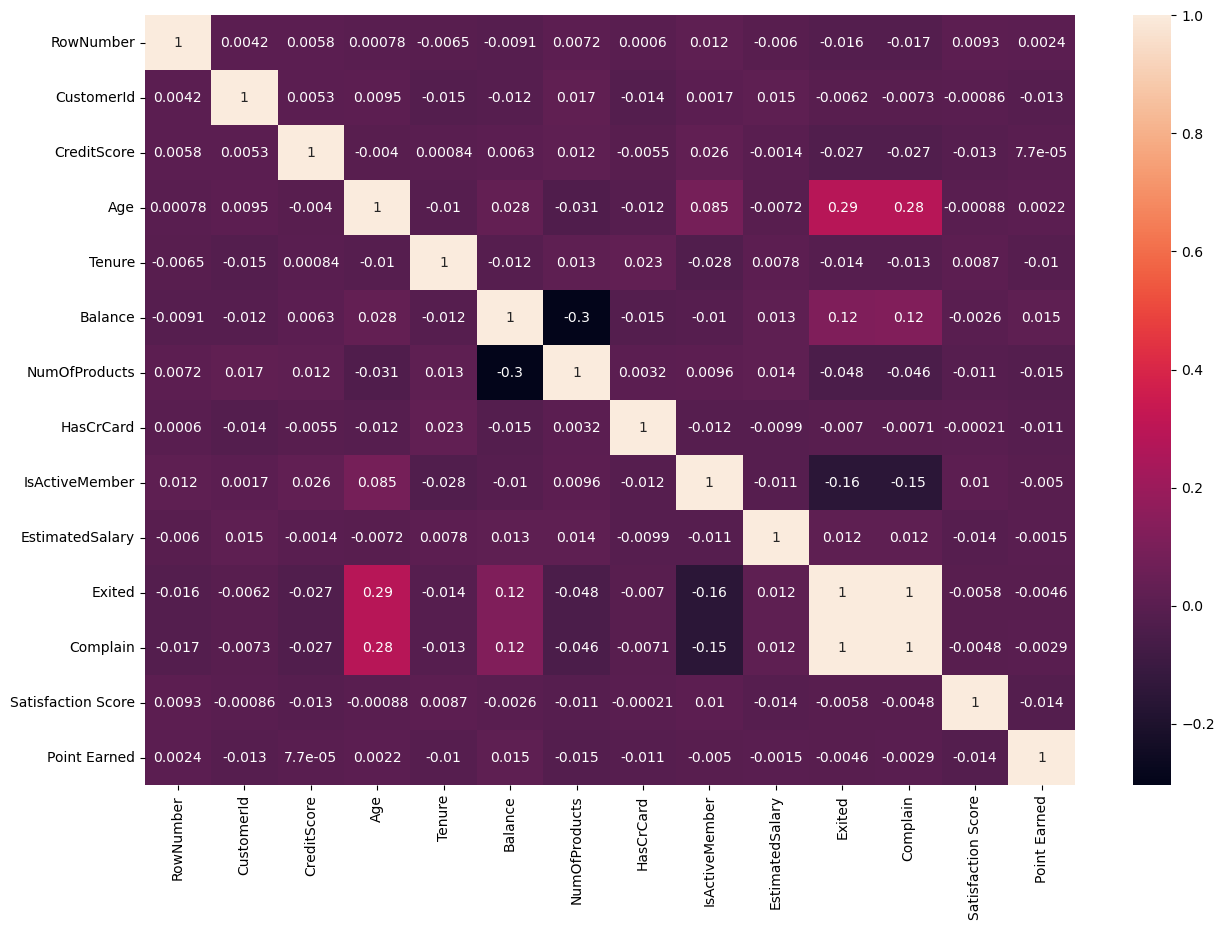

In [10]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True)

In [11]:
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [12]:
df.drop_duplicates()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339


In [13]:
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)
df.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [14]:
for i in list(df.select_dtypes(include=['object']).columns):
    print(i, '-------->', df[i].nunique())

Geography --------> 3
Gender --------> 2
Card Type --------> 4


In [15]:
for i in list(df.select_dtypes(exclude=['object']).columns):
    print(i, '------->', df[i].nunique())

CreditScore -------> 460
Age -------> 70
Tenure -------> 11
Balance -------> 6382
NumOfProducts -------> 4
HasCrCard -------> 2
IsActiveMember -------> 2
EstimatedSalary -------> 9999
Exited -------> 2
Complain -------> 2
Satisfaction Score -------> 5
Point Earned -------> 785


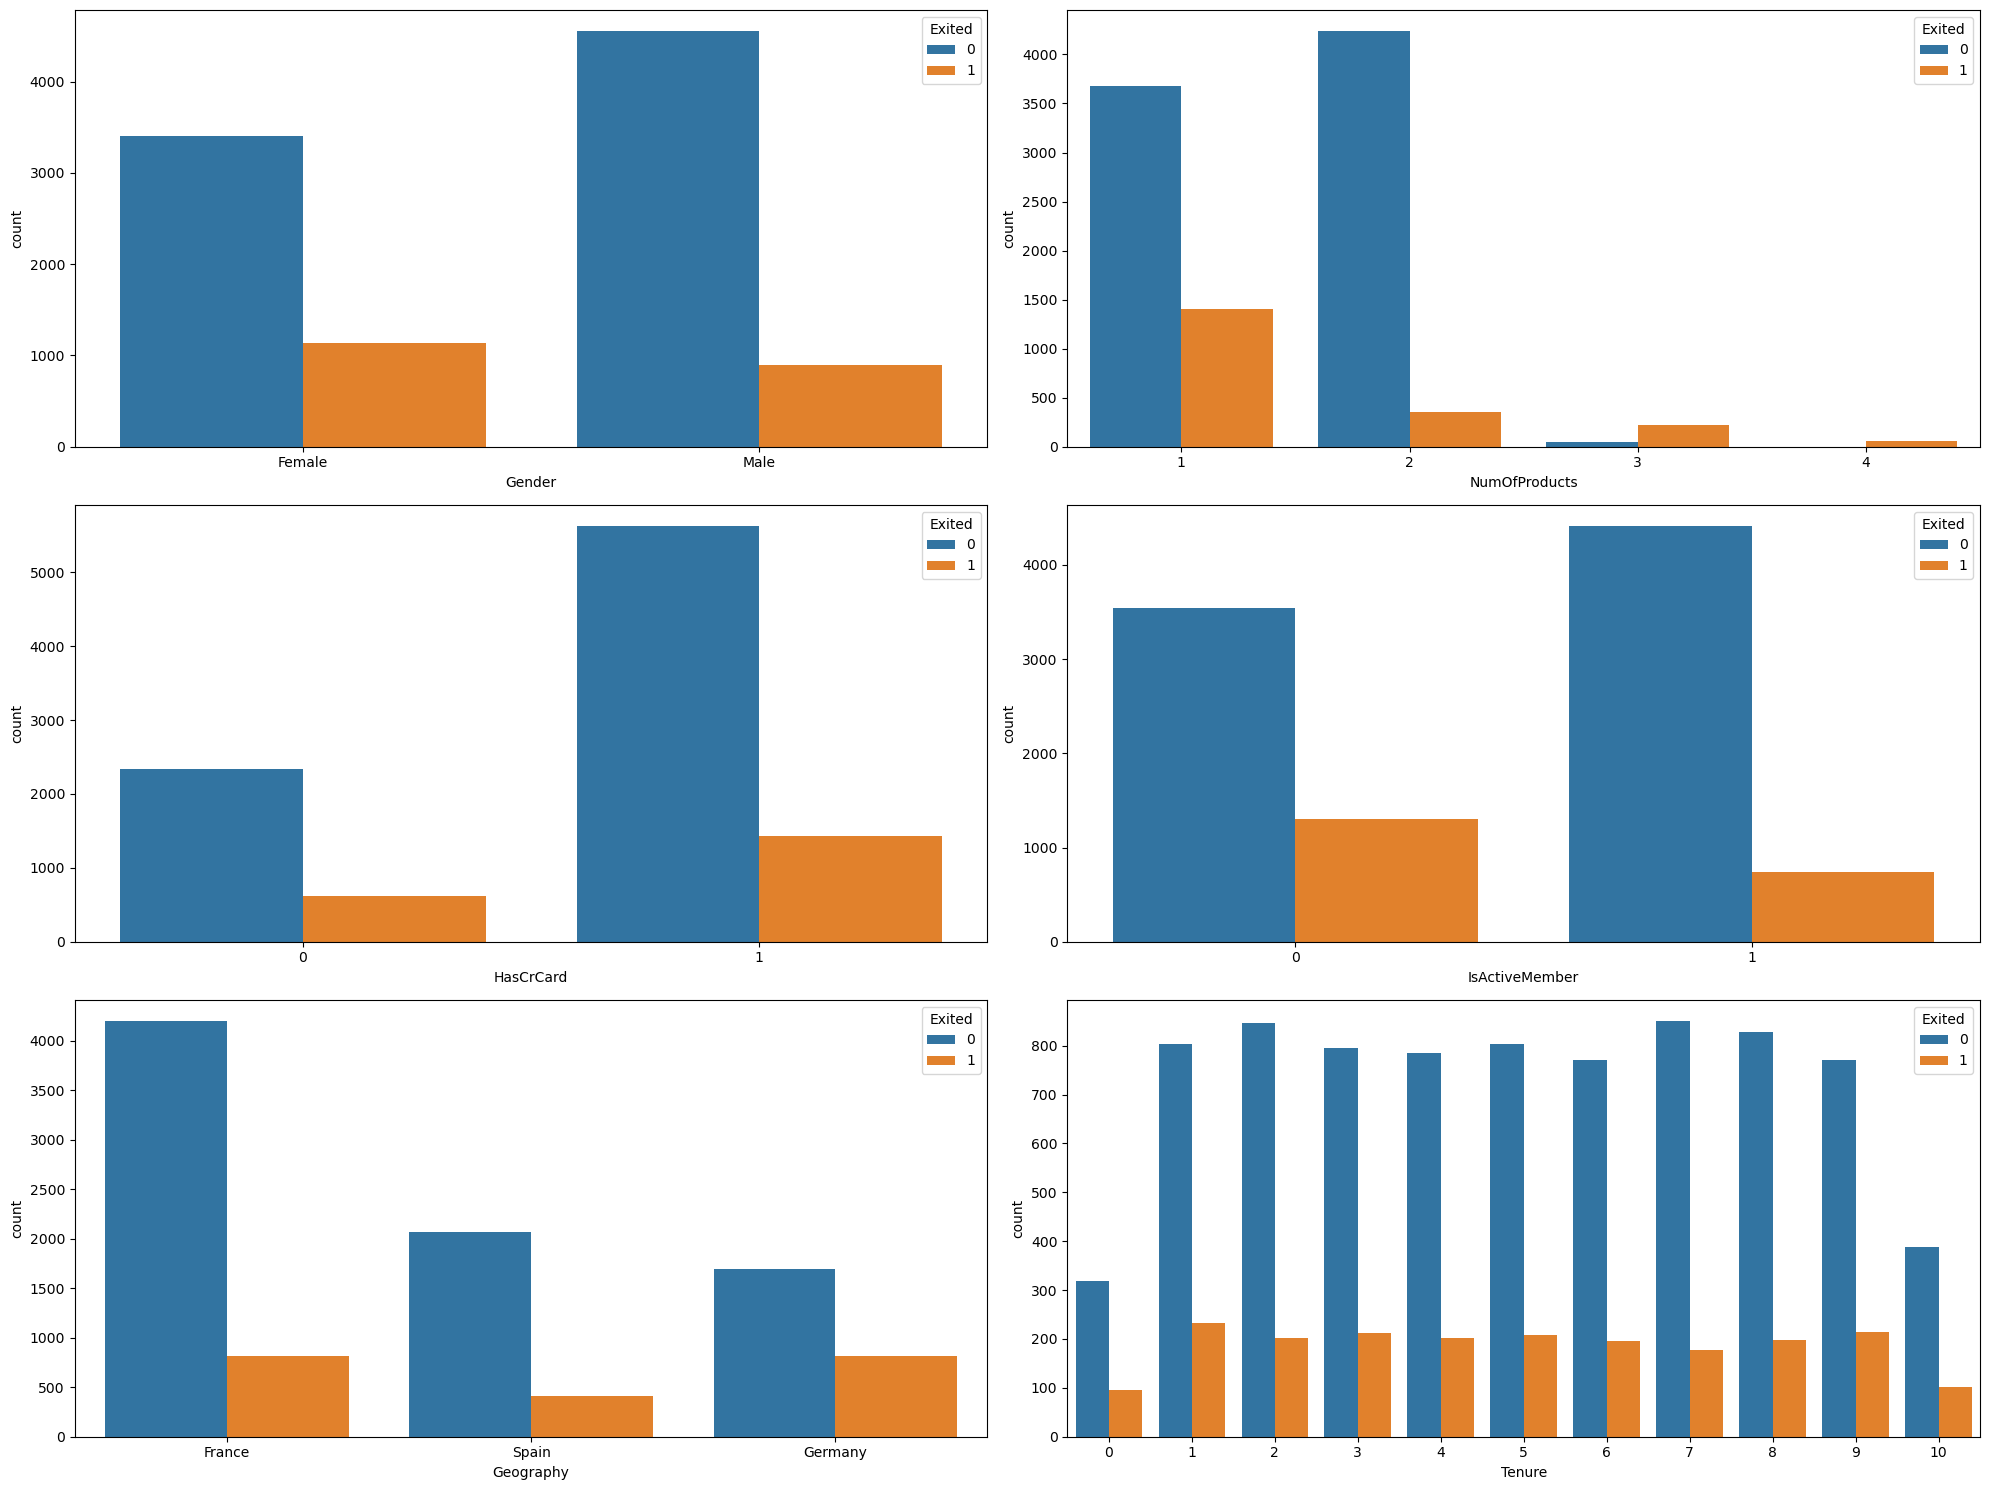

In [16]:
# Assigning variable on the col_m variable for bivariate analysis
col_m=['Gender', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Geography', 'Tenure']

fig, axs=plt.subplots(nrows=3, ncols=2, figsize=(20,15))
axs=axs.flatten()
for i,j in enumerate(col_m):
    sns.countplot(data=df, x=j, hue='Exited', ax=axs[i])
fig.tight_layout()
plt.show()

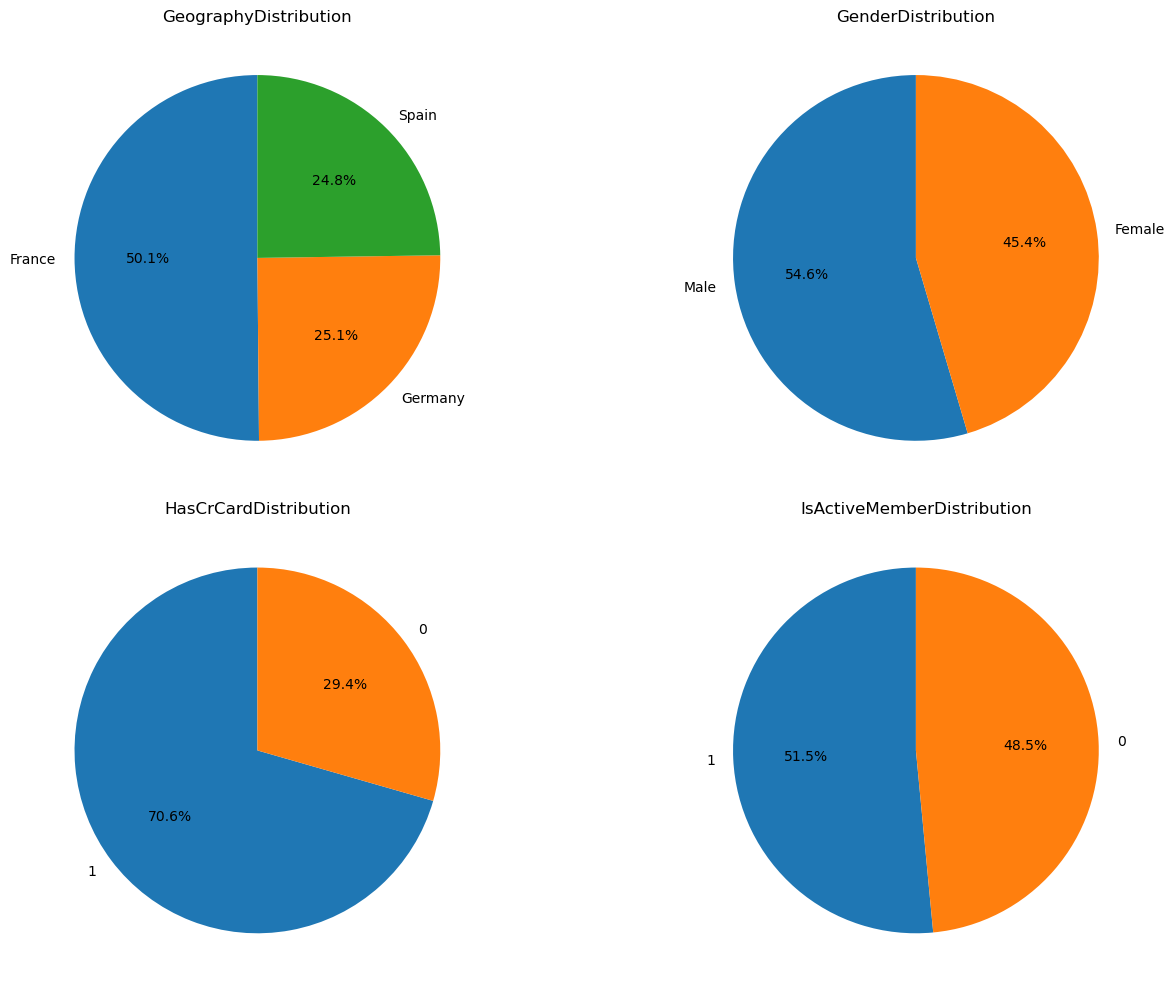

In [17]:
# Assigning variable on the col_m variable for bivariate analysis

cat_obj=['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']
fig,axs=plt.subplots(nrows=2, ncols=2, figsize=(15,10))
for i, j in enumerate(cat_obj):
    if i < len(axs.flat):
        obj_cont=df[j].value_counts()
        axs.flat[i].pie(obj_cont, labels=obj_cont.index, autopct="%1.1f%%", startangle=90)
        axs.flat[i].set_title(j+ 'Distribution')
plt.tight_layout()
plt.show()

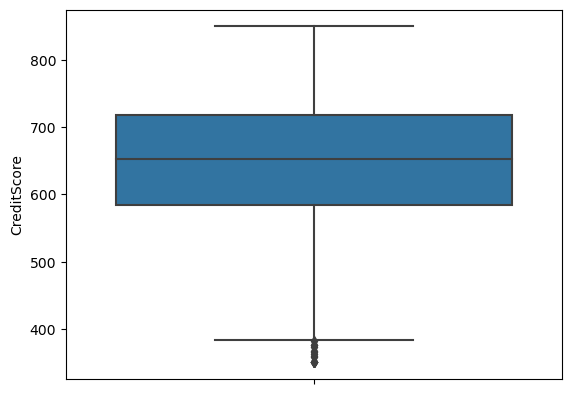

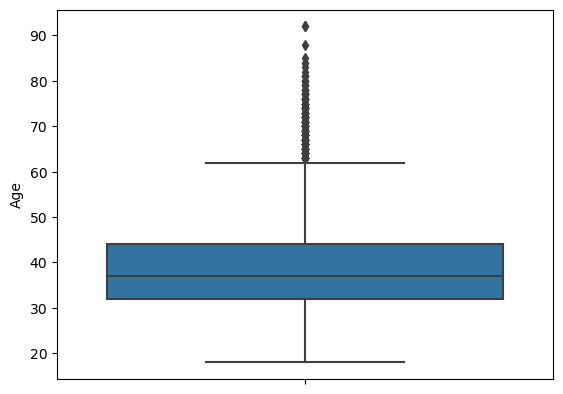

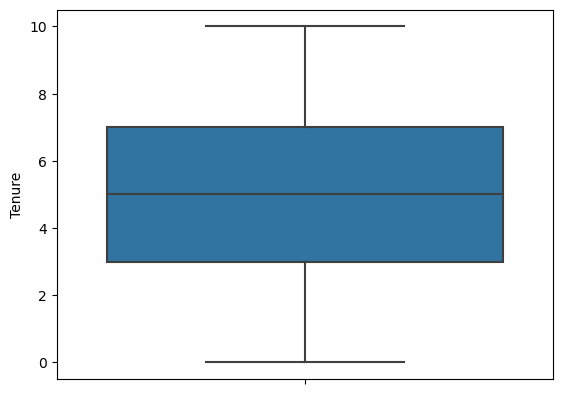

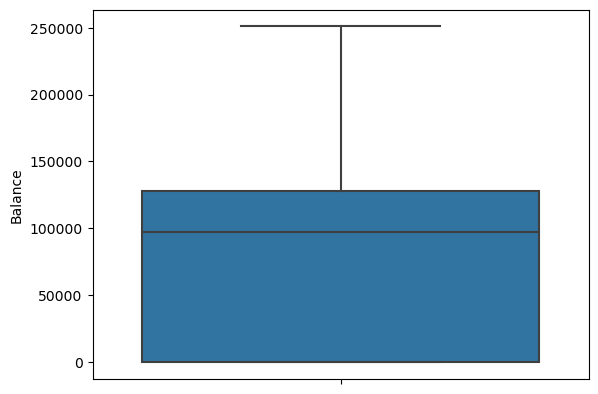

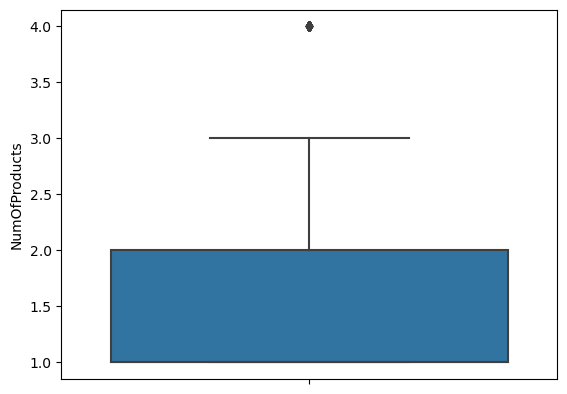

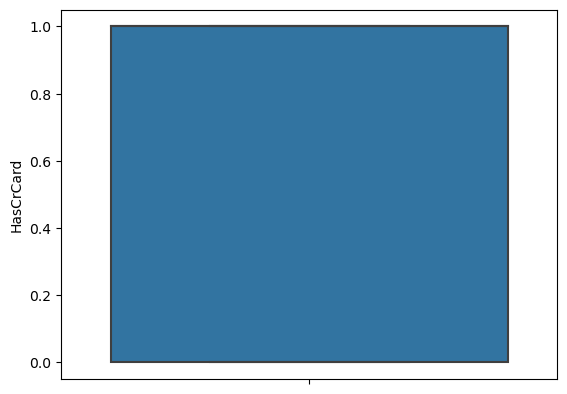

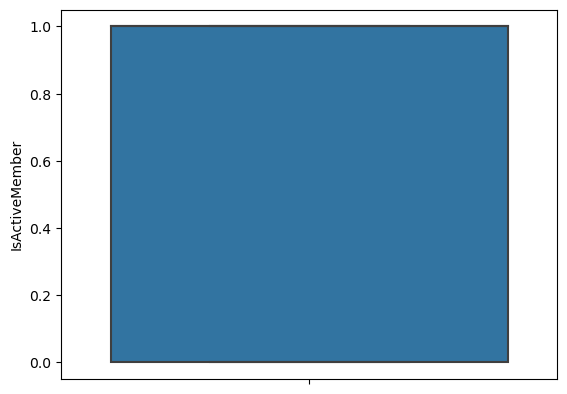

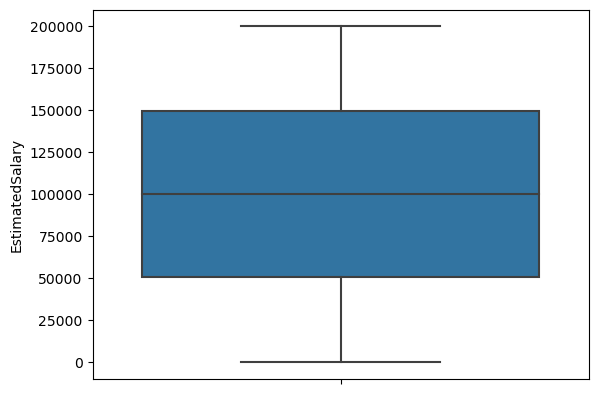

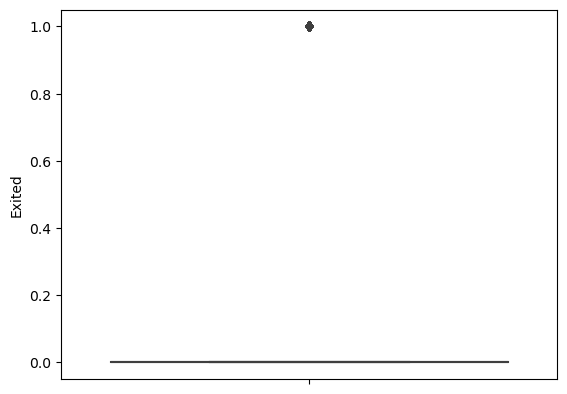

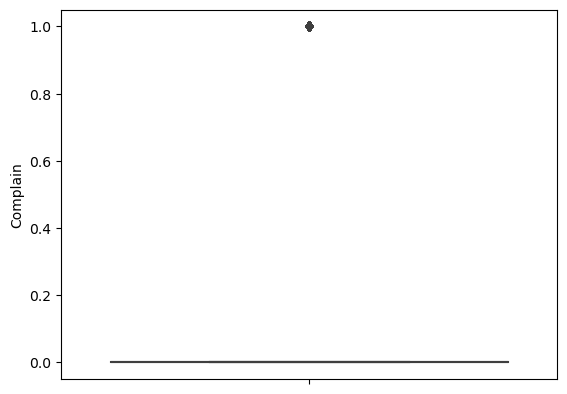

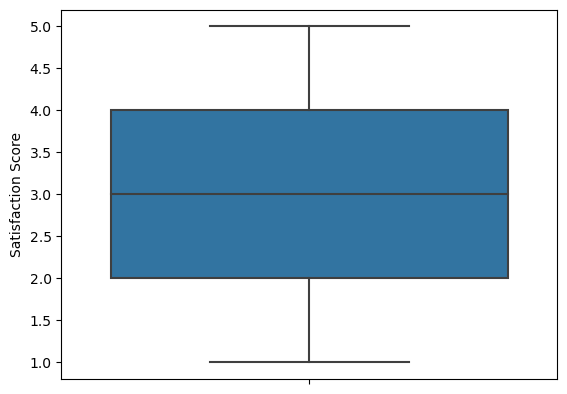

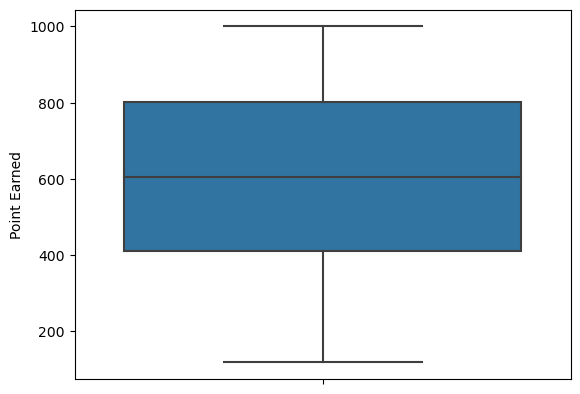

In [18]:
def boxplot(cols):
    sns.boxplot(y=df[cols])
    plt.show()
    

for cols in list(df.select_dtypes(exclude=['object']).columns):
    boxplot(cols)

In [19]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'Complain', 'Satisfaction Score', 'Card Type',
       'Point Earned'],
      dtype='object')

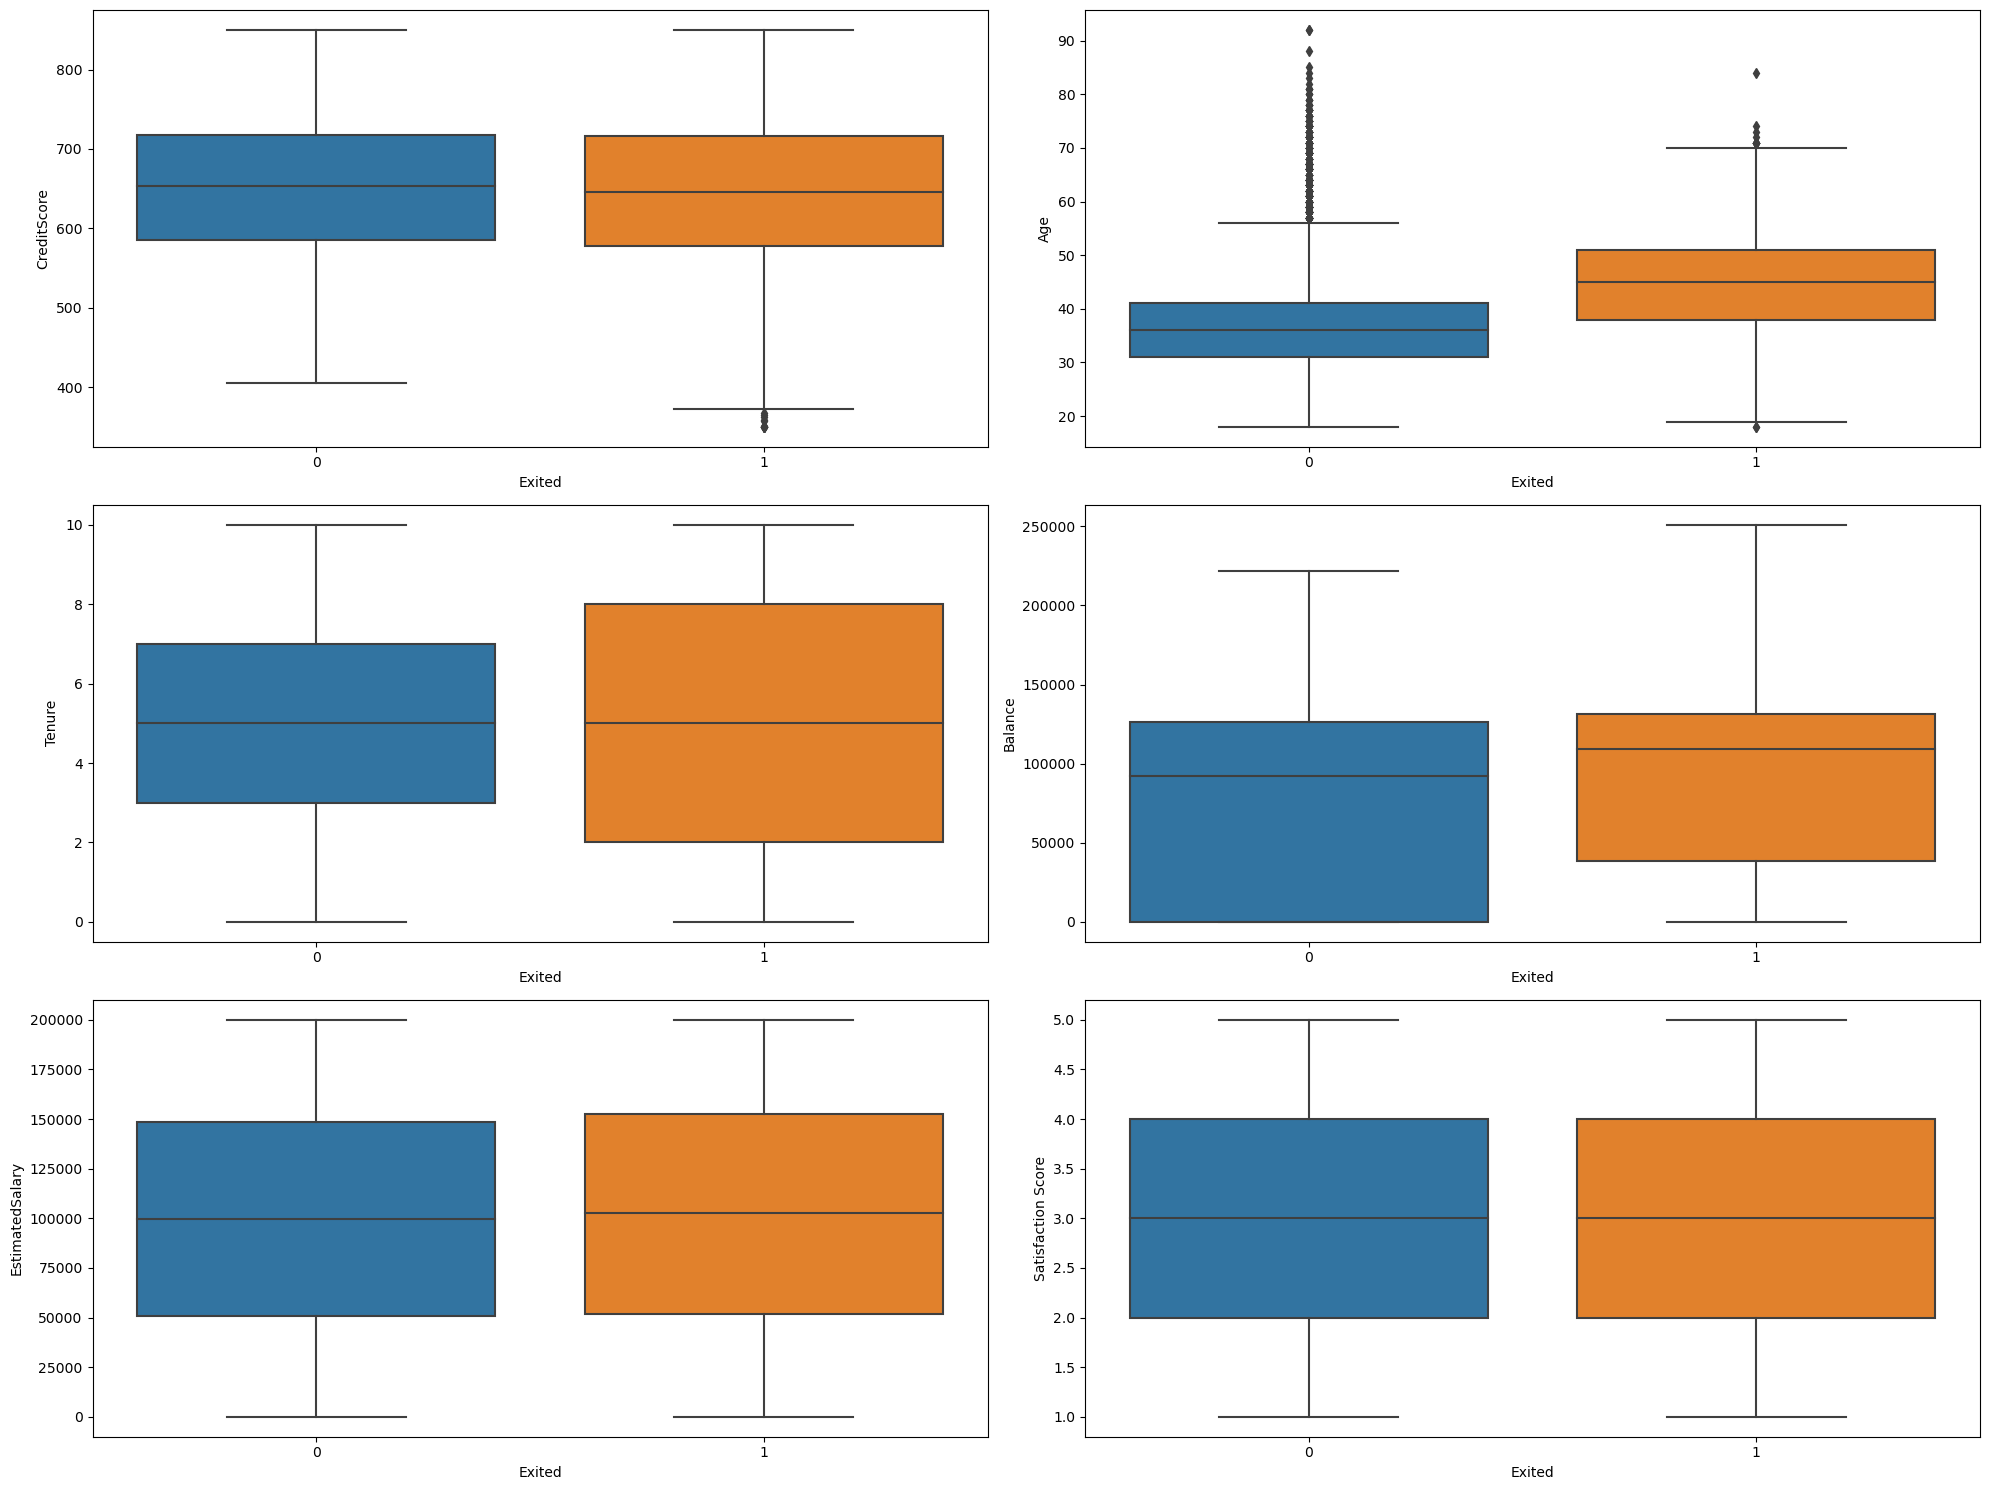

In [20]:
num_1=['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary', 'Satisfaction Score']
fig, axs=plt.subplots(nrows=3, ncols=2, figsize=(20,15))
axs=axs.flatten()

for i, j in enumerate(num_1):
    sns.boxplot(y=j, x='Exited', data=df, ax=axs[i])
plt.tight_layout()
plt.show()

In [21]:
from sklearn import preprocessing

In [22]:
for col in df.select_dtypes(include=['object']).columns:
    label_encode=preprocessing.LabelEncoder()
    label_encode.fit(df[col].unique())
    df[col]=label_encode.transform(df[col])
    print(f"{col}:\n{df[col].unique()}")

Geography:
[0 2 1]
Gender:
[0 1]
Card Type:
[0 1 3 2]


<AxesSubplot:>

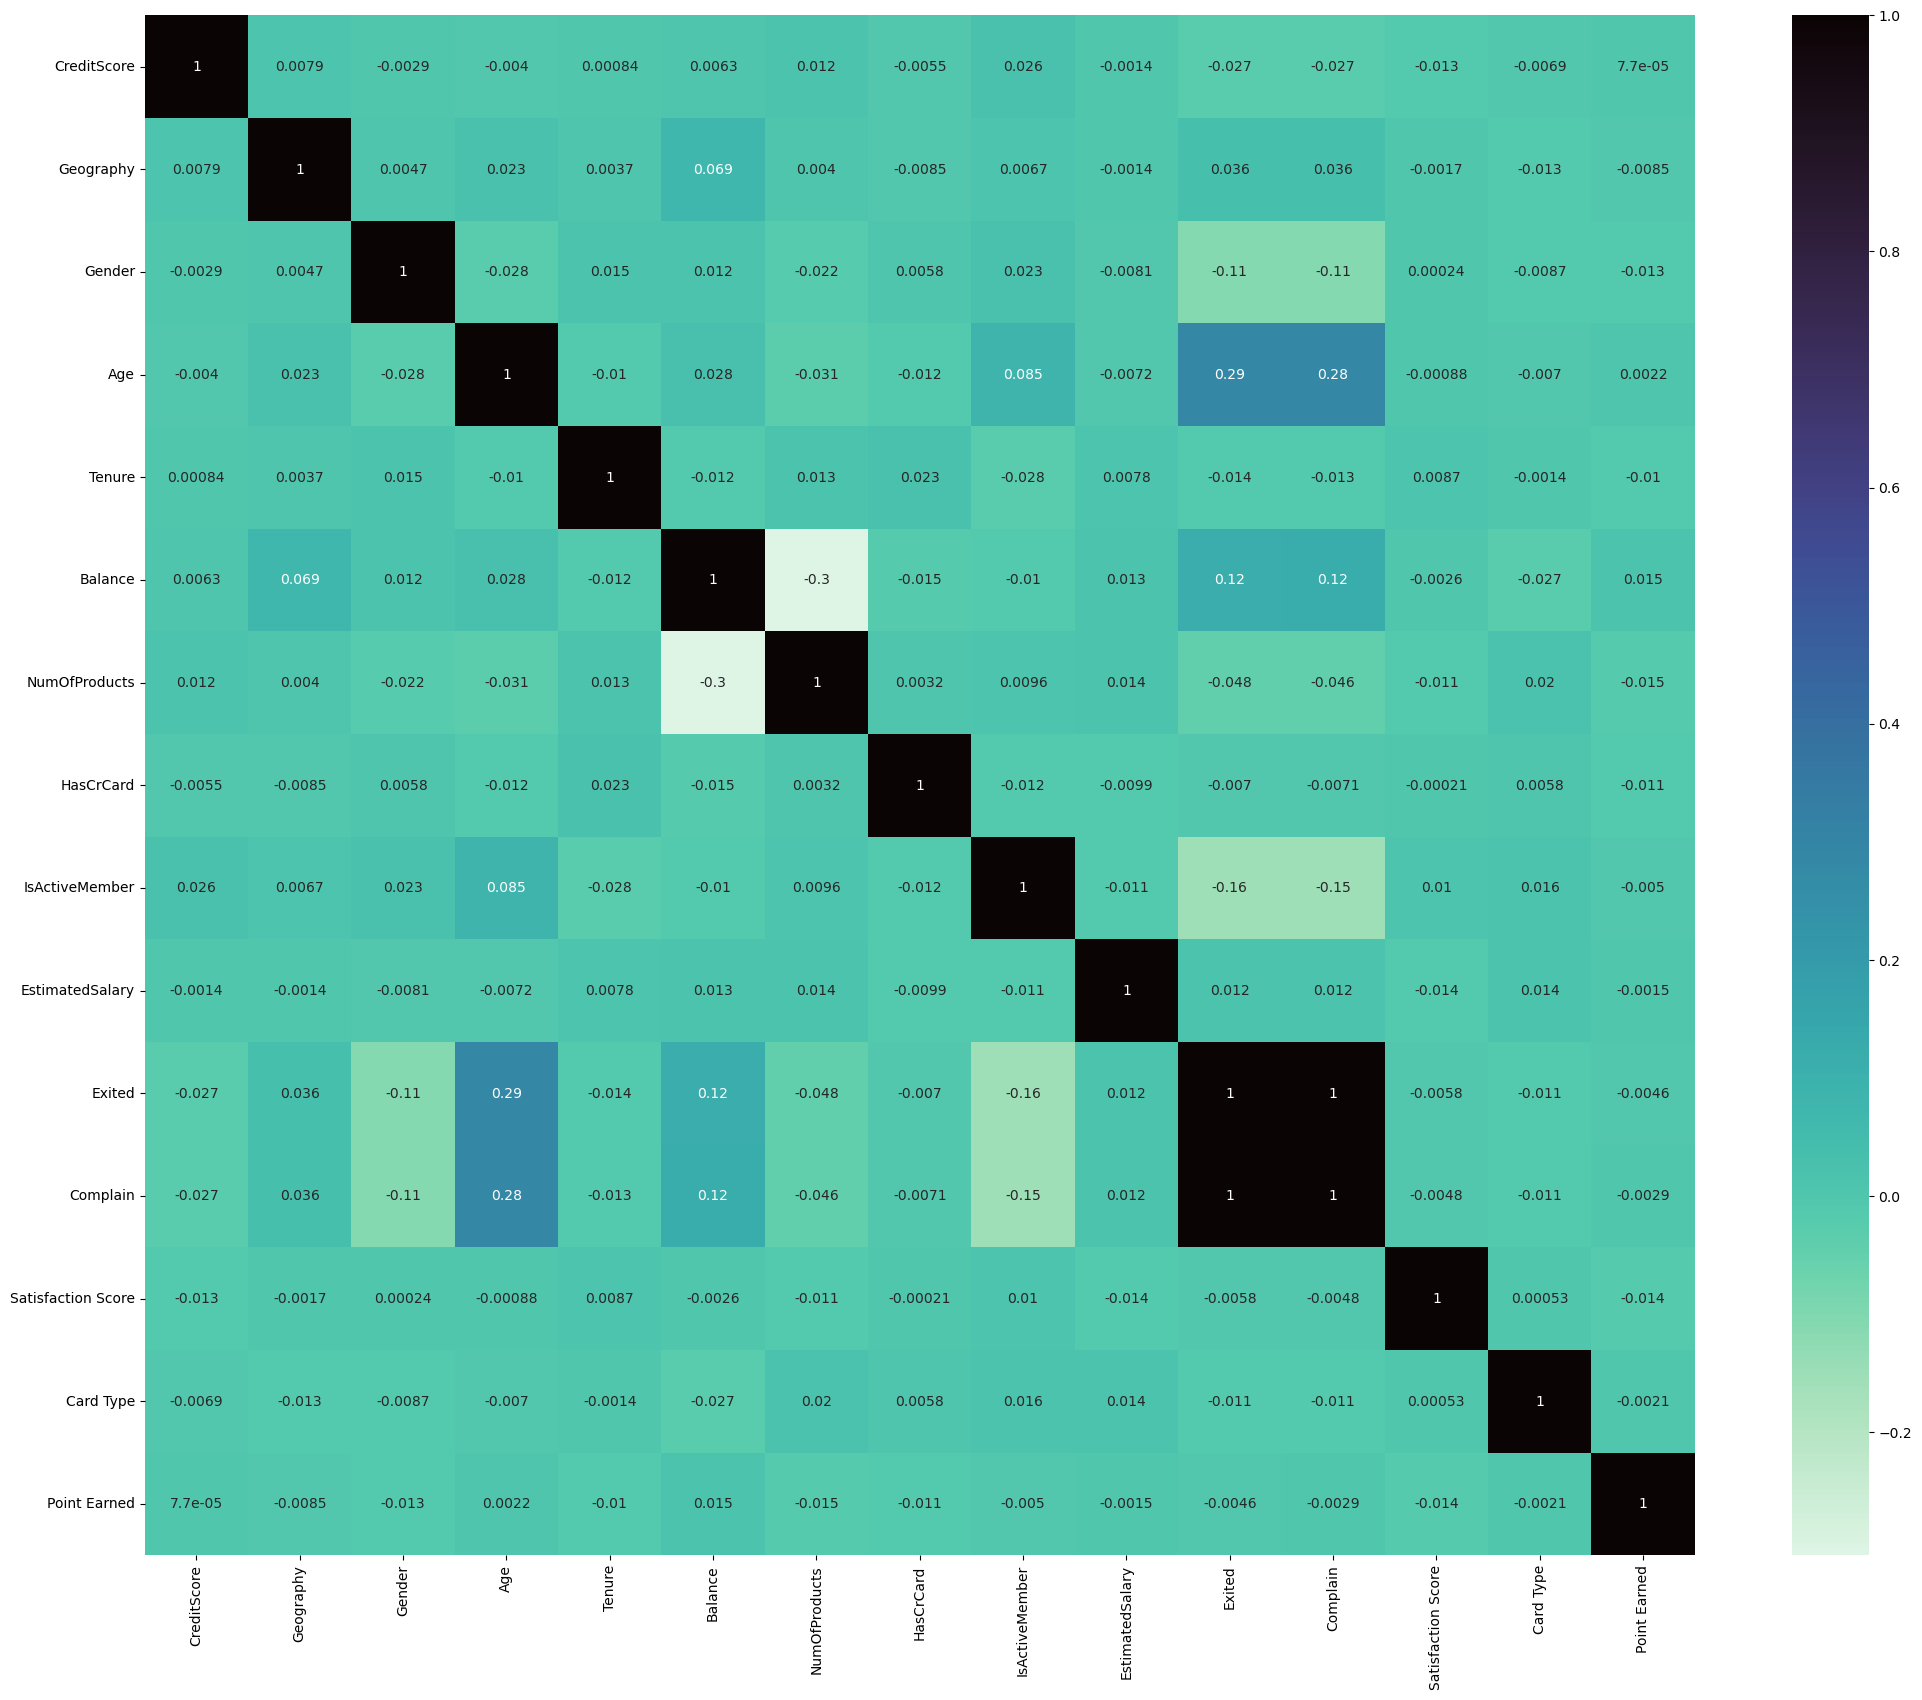

In [23]:
plt.figure(figsize=(25,20))
sns.heatmap(df.corr(), cmap='mako_r', annot=True)

In [44]:
from sklearn.model_selection import train_test_split, GridSearchCV
from scipy import stats
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier

In [25]:
x=df.drop(['Exited'], axis=1)
y=df['Exited']
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [26]:
# Outlier detection and remove

sele_col=['Age', 'NumOfProducts', 'NumOfProducts']
z_score=np.abs(stats.zscore(x_train[sele_col]))
thershold=3
outlier_inde=np.where(z_score > thershold)[0]
x_train=x_train.drop(x_train.index[outlier_inde])
y_train=y_train.drop(y_train.index[outlier_inde])

In [27]:
dt_model=DecisionTreeClassifier(random_state=42)
param_data={
    'max_depth':[3,4,5,6,7],
    'min_samples_split':[2,3,4],
    'min_samples_leaf':[1,2,3,4],
    'criterion':['gini', 'entropy', 'log_loss']
}
cv_dt=GridSearchCV(dt_model, cv=10,
                  param_grid=param_data)
cv_dt.fit(x_train, y_train)
cv_dt.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'min_samples_leaf': 2,
 'min_samples_split': 2}

In [28]:
model_dt=DecisionTreeClassifier(max_depth=3,
                               min_samples_leaf=2,
                               min_samples_split=2,
                               criterion='gini', random_state=42)
model_dt.fit(x_train, y_train)
model_dt_train_score=model_dt.score(x_train, y_train)
print('Training Score: ',model_dt_train_score)
model_dt.fit(x_test, y_test)
model_dt_test_score=model_dt.score(x_test, y_test)
print('Testing Score: ',model_dt_test_score)

Training Score:  0.998470168281489
Testing Score:  0.999


In [37]:
y_pred=model_dt.predict(x_test)
y_pred_prob=model_dt.predict_proba(x_test)[:, 1]
print(f"Accuracy Score: {round(accuracy_score(y_test, y_pred)*100,2)}")

Accuracy Score: 99.9


In [33]:
print('F1 Score: ', (f1_score(y_test, y_pred)))
print('Precision Score: ',(precision_score(y_test, y_pred)))
print("Recall Score: ", (recall_score(y_test, y_pred)))

F1 Score:  0.9974554707379135
Precision Score:  0.9974554707379135
Recall Score:  0.9974554707379135


Feature ranking:
1. feature 10 (0.997890)
2. feature 13 (0.001058)
3. feature 4 (0.000984)
4. feature 3 (0.000068)
5. feature 12 (0.000000)
6. feature 11 (0.000000)
7. feature 9 (0.000000)
8. feature 8 (0.000000)
9. feature 7 (0.000000)
10. feature 6 (0.000000)
11. feature 5 (0.000000)
12. feature 2 (0.000000)
13. feature 1 (0.000000)
14. feature 0 (0.000000)


Text(0.5, 0, 'index of the feature')

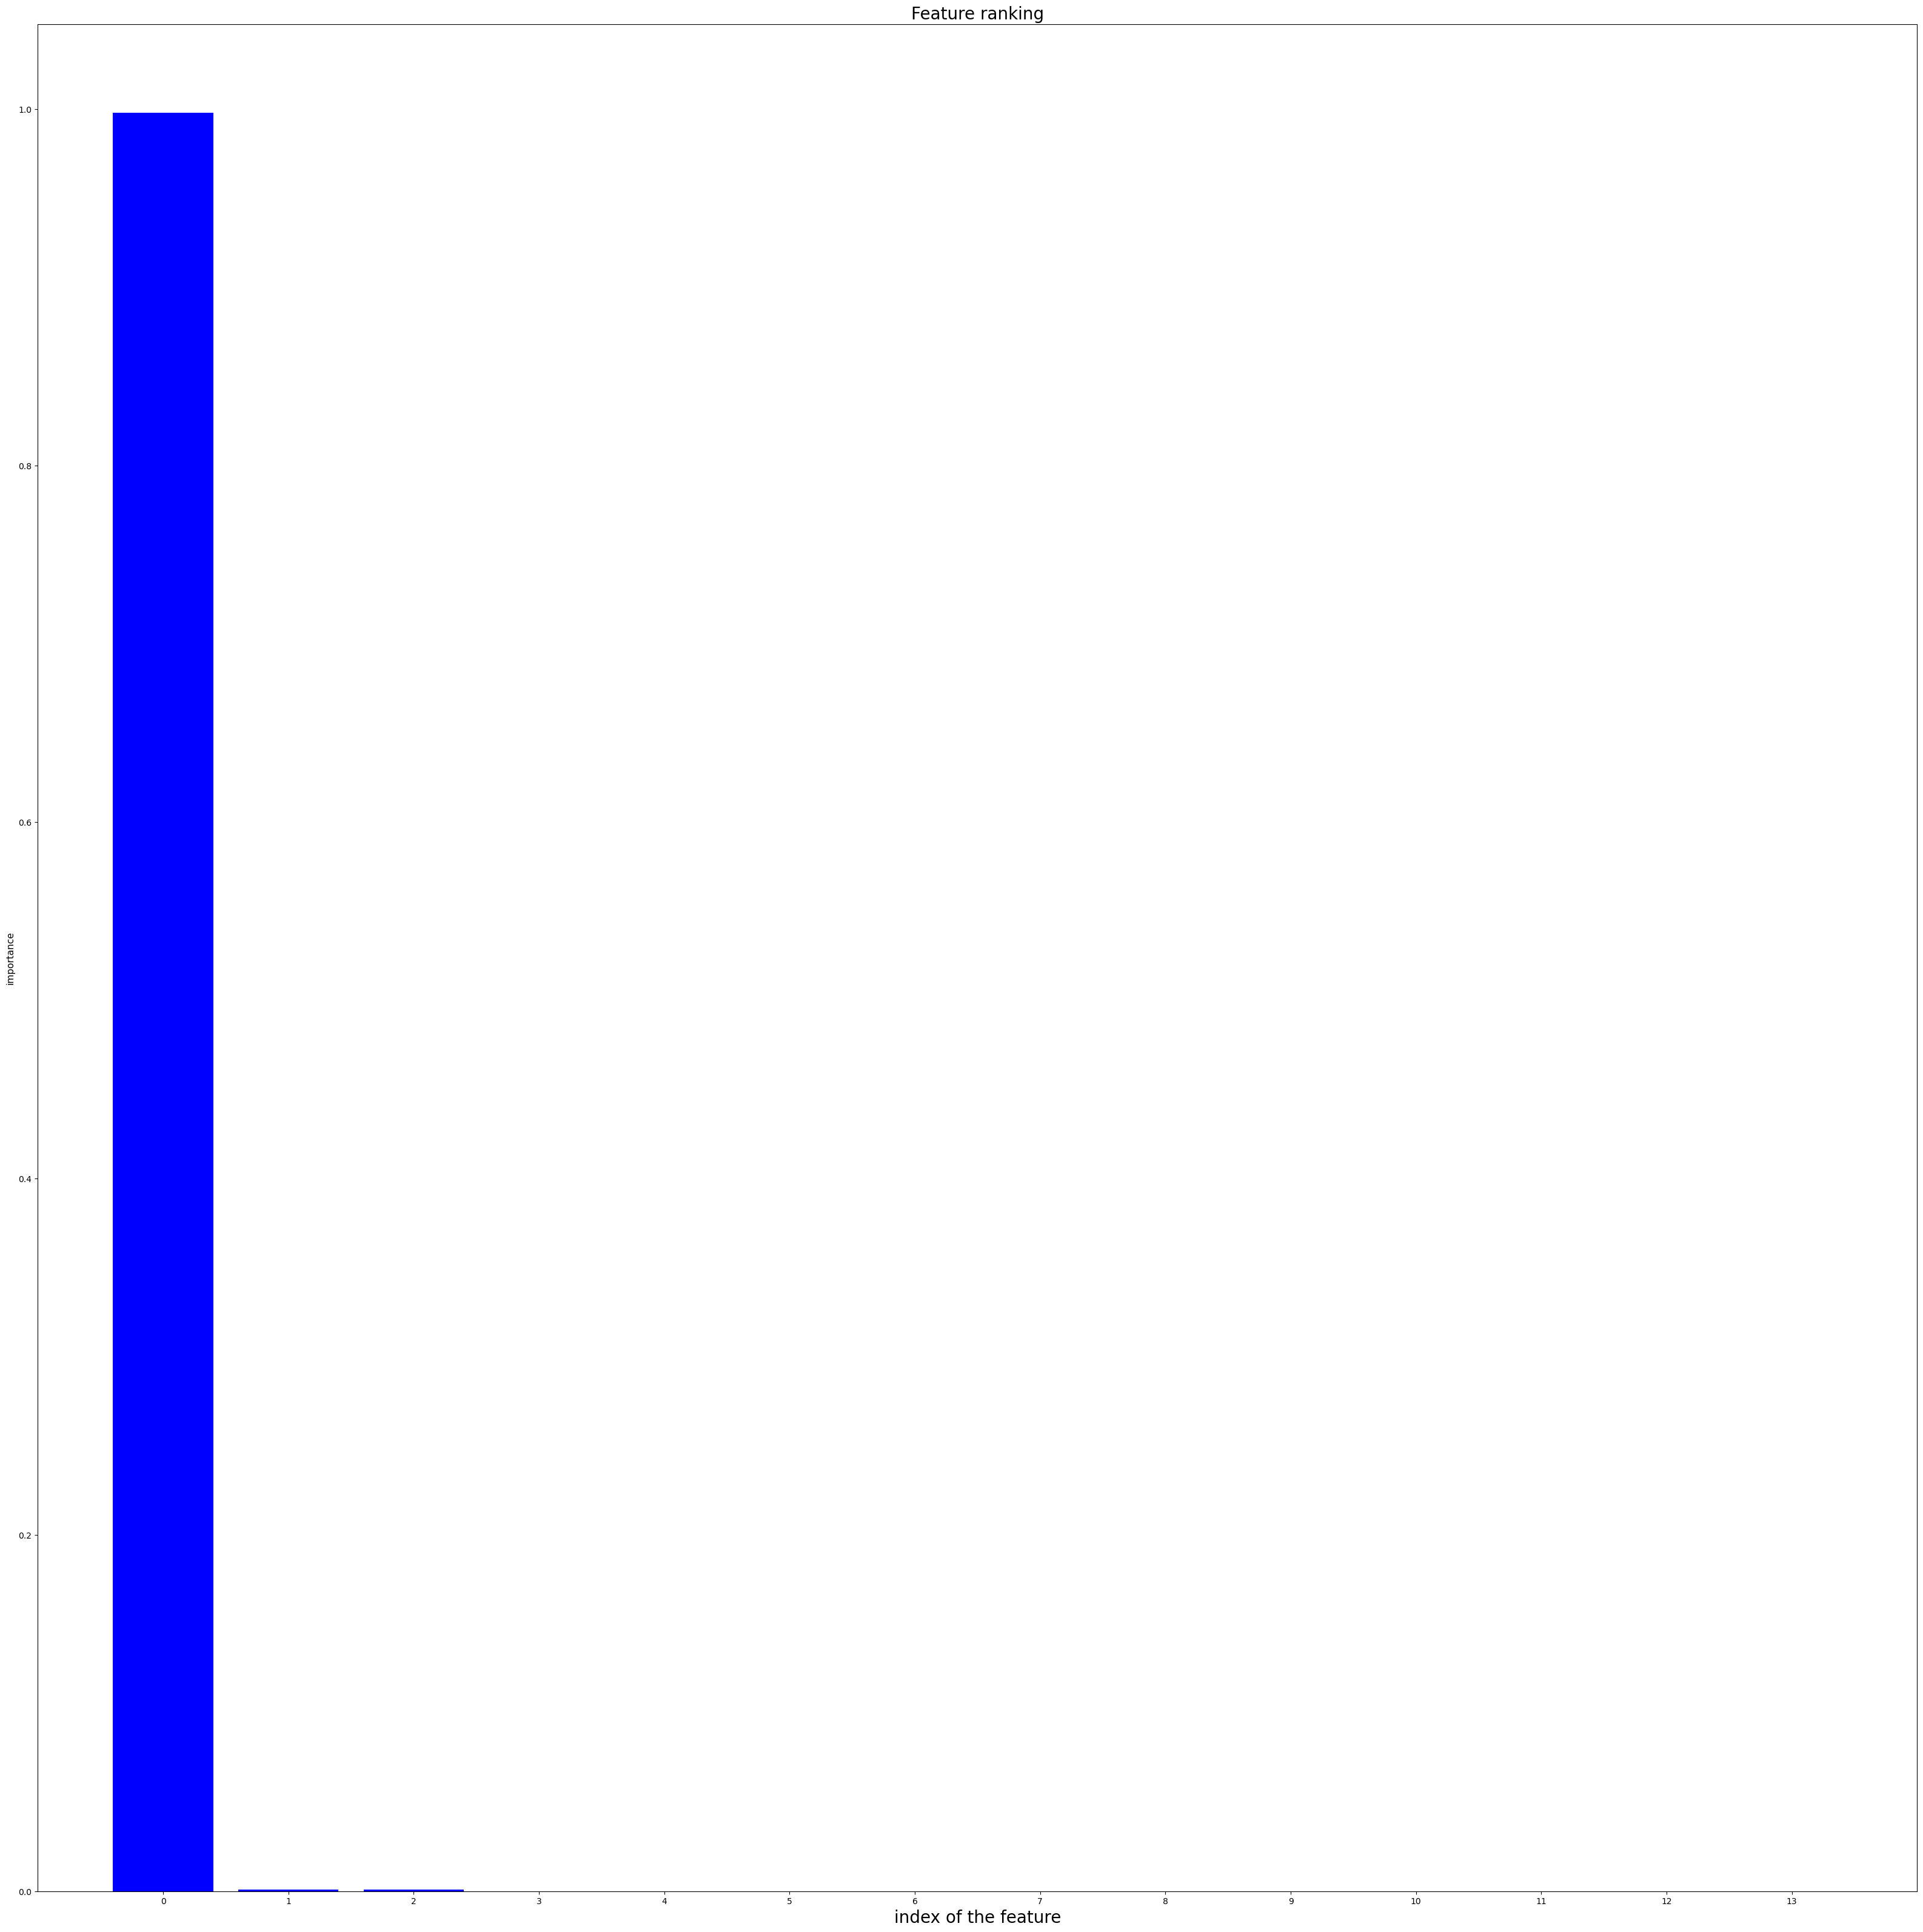

In [34]:
importances= model_dt.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(x.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
    
f, ax = plt.subplots(figsize=(40,40))
plt.title("Feature ranking", fontsize = 20)
plt.bar(range(x_train.shape[1]), importances[indices],
    color="b", 
    align="center")
plt.xticks(range(x_train.shape[1]))
plt.xlim([-1, x_train.shape[1]])
plt.ylabel("importance", fontsize = 11)
plt.xlabel("index of the feature", fontsize = 20)

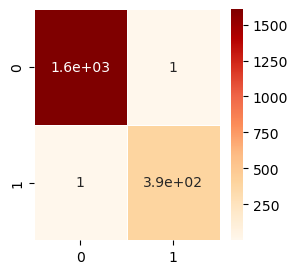

In [41]:
cm=confusion_matrix(y_test, y_pred)
plt.figure(figsize=(3,3))
sns.heatmap(data=cm, annot=True, cmap='OrRd', linewidths=0.5)
plt.show()

In [42]:
fpr_dt, tpr_dt, _ =roc_curve(y_test, y_pred_prob)
roc_auc_dt = auc(fpr_dt, tpr_dt)

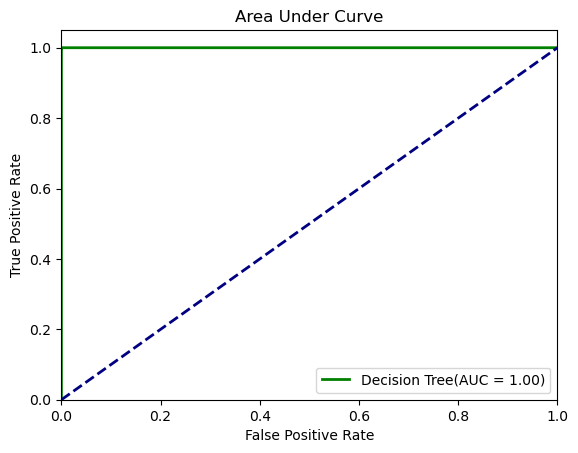

In [43]:
plt.figure(1)
lw = 2
plt.plot(fpr_dt, tpr_dt, color='green',
         lw=lw, label='Decision Tree(AUC = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.legend(loc="lower right")
plt.show()

In [47]:
model_rf=RandomForestClassifier(random_state=42)
param_data={
    'max_depth':[None, 5, 10],
    'n_estimators':[100,200],
    'max_features':['sqrt', 'log2', None],
    'criterion':['gini', 'entropy', 'log_loss']
}
cv_rf=GridSearchCV(model_rf, cv=10,
                  param_grid=param_data)
cv_rf.fit(x_train, y_train)
cv_rf.best_params_

{'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'n_estimators': 100}

In [48]:
model_rf=RandomForestClassifier(criterion='gini',
                               max_depth=None,
                               max_features='sqrt',
                               n_estimators=100)
model_rf.fit(x_train, y_train)
model_rf_train_score=model_rf.score(x_train, y_train)
print('Training Score: ', model_rf_train_score)
model_rf.fit(x_test, y_test)
model_rf_test_score=model_rf.score(x_test, y_test)
print('Testing Score: ', model_rf_test_score)

Training Score:  1.0
Testing Score:  1.0


In [49]:
y_pred_rf=model_rf.predict(x_test)
y_pred_rf_prob=model_rf.predict_proba(x_test)[:, 1]

In [50]:
print('Accuracy Score: ', (accuracy_score(y_test, y_pred_rf)))
print('F1 Score: ', (f1_score(y_test, y_pred_rf)))
print('Recall Score: ', (recall_score(y_test, y_pred_rf)))
print('Precision Score: ', (precision_score(y_test, y_pred_rf)))

Accuracy Score:  1.0
F1 Score:  1.0
Recall Score:  1.0
Precision Score:  1.0


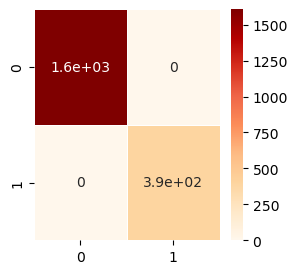

In [51]:
cm=confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(3,3))
sns.heatmap(data=cm, annot=True, cmap='OrRd', linewidths=0.5)
plt.show()

In [52]:
fpr_rf, tpr_rf, _ =roc_curve(y_test, y_pred_rf_prob)
roc_auc_rf = auc(fpr_rf, tpr_rf)

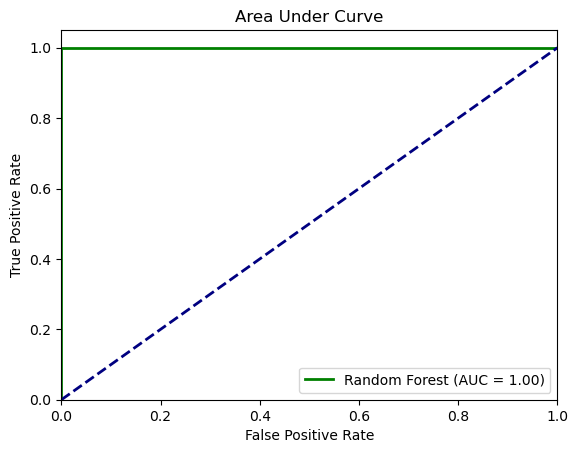

In [53]:
plt.figure(1)
lw = 2
plt.plot(fpr_rf, tpr_rf, color='green',
         lw=lw, label='Random Forest (AUC = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.legend(loc="lower right")
plt.show()